In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.stats import skewnorm
from scipy.stats import exponnorm
from customplotting.general import plot_xy, save_fig
from functions import *

In [2]:
"""Recycle params for plotting"""
plt.rc('xtick', labelsize = 30)
plt.rc('xtick.major', pad = 3)
plt.rc('ytick', labelsize = 30)
plt.rc('lines', lw = 3.5, markersize = 20.5)
plt.rc('legend', fontsize = 30)
plt.rc('axes', linewidth = 3.5)

### First case k1 = 1e5 s^-1
Simple continuity equation considering just the radiative (k2) and defect-assisted non-radiative recombination (k1)
* k1 = 1e5
* k2 = 2e-10 cm^3 s^-1
* n0 = 1e14
* t = 0 to 1000 ns

In [3]:
# function dn/dt
def model_1(n,t):
    k1= 1e5
    k2= 2e-10
    dndt= -(k2*(n**2) + k1*n)
    return dndt

In [4]:
# initial condition
n0 = np.power(10, 14)

In [5]:
# time points
t = np.linspace(0,1000)*1e-9

In [6]:
# solve differential equation
n = odeint(model_1, n0, t)

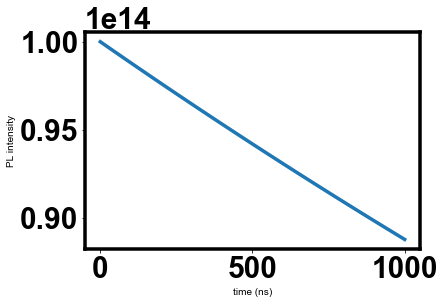

In [7]:
plt.plot(t*1e9, n)
plt.xlabel('time (ns)')
plt.ylabel('PL intensity')
plt.show()

In [17]:
stretched_exp = stretch_exp_fit(n/np.max(n), t)
print("tau_c (ns) = "+str(stretched_exp[0]*1e9))
print("Beta = "+str(stretched_exp[1]))
print("avg. tau (ns) = "+str(stretched_exp[3]*1e9))

tau_c (ns) = 9986.384817134422
Beta = 0.9998305252543555
avg. tau (ns) = 9987.100593722334


In [23]:
double_exp = double_exp_fit(n/np.max(n), t)
print("tau1 (ns) = "+str(double_exp[0]*1e9))
print("a1 = "+str(double_exp[1]))
print("tau2 (ns) = "+str(double_exp[2]*1e9))
print("a2 = "+str(double_exp[3]))
print("avg. tau (ns) = "+str(double_exp[4]*1e9))

tau1 (ns) = 642.6148063087567
a1 = 1.4835761758980048e-05
tau2 (ns) = 9997.772304125961
a2 = 0.9926434166963368
avg. tau (ns) = 9997.632486734112


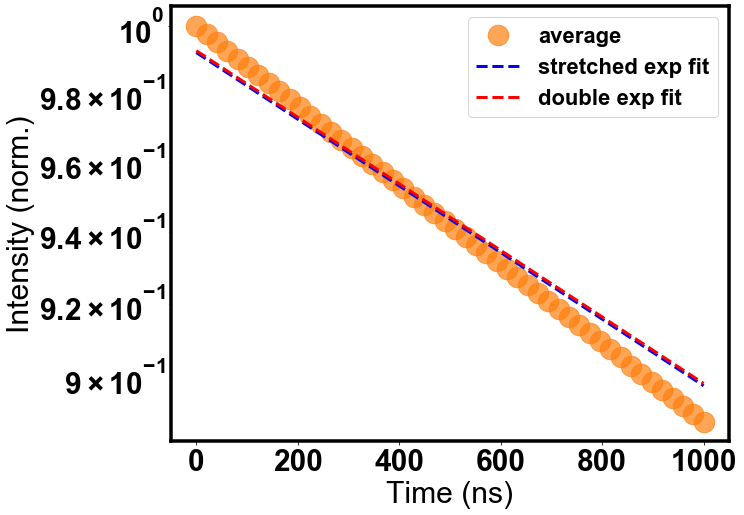

In [24]:
# plot
plt.figure(figsize=(10,8))
plt.plot(t*1e9, n/np.max(n),'C1o', alpha=0.7,label="average")
plt.plot(t*1e9, stretched_exp[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t*1e9, double_exp[5], 'r--', lw = 3, label="double exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend(fontsize=22)

### Second case k1 = 1e7 s^-1
Simple continuity equation considering just the radiative (k2) and defect-assisted non-radiative recombination (k1)
* k1 = 1e7
* k2 = 2e-10 cm^3 s^-1
* n0 = 1e14
* t = 0 to 1000 ns

In [25]:
# function dn/dt
def model_2(n,t):
    k1= 1e7
    k2= 2e-10
    dndt= -(k2*(n**2) + k1*n)
    return dndt

In [26]:
# solve differential equation
n = odeint(model_2, n0, t)

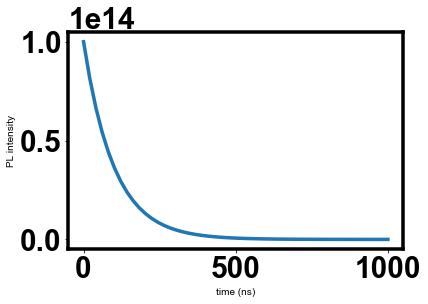

In [27]:
plt.plot(t*1e9, n)
plt.xlabel('time (ns)')
plt.ylabel('PL intensity')
plt.show()

In [32]:
stretched_exp = stretch_exp_fit(n/np.max(n), t)
print("tau_c (ns) = "+str(stretched_exp[0]*1e9))
print("Beta = "+str(stretched_exp[1]))
print("avg. tau (ns) = "+str(stretched_exp[3]*1e9))

tau_c (ns) = 9171.557884552514
Beta = 0.9898003805781134
avg. tau (ns) = 9211.917307381733


In [39]:
double_exp = double_exp_fit(n/np.max(n), t)
print("tau1 (ns) = "+str(double_exp[0]*1e9))
print("a1 = "+str(double_exp[1]))
print("tau2 (ns) = "+str(double_exp[2]*1e9))
print("a2 = "+str(double_exp[3]))
print("avg. tau (ns) = "+str(double_exp[4]*1e9))

tau1 (ns) = 120.98632833310407
a1 = 0.004593621728040065
tau2 (ns) = 9460.500925781644
a2 = 0.2525821942375638
avg. tau (ns) = 9293.680429759866


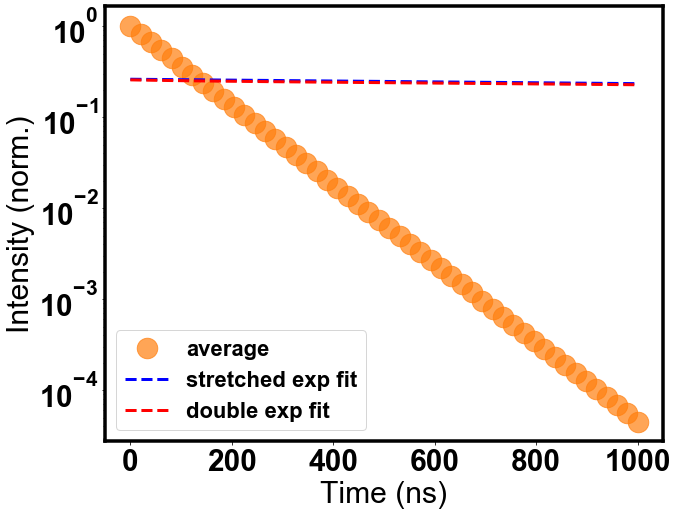

In [40]:
# plot
plt.figure(figsize=(10,8))
plt.plot(t*1e9, n/np.max(n),'C1o', alpha=0.7,label="average")
plt.plot(t*1e9, stretched_exp[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t*1e9, double_exp[5], 'r--', lw = 3, label="double exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend(fontsize=22)

### Third case k1 from 1e5 to 1e7 s^-1
Simple continuity equation considering just the radiative (k2) and defect-assisted non-radiative recombination (k1)
* k1 = 1e5 to 1e7
* k2 = 2e-10 cm^3 s^-1
* n0 = 1e14
* t = 0 to 1000 ns

In [41]:
# function dn/dt
def model_3(n,t):
    k1= np.linspace(1e5, 1e7, 50)
    k2= 2e-10
    dndt= -(k2*(n**2) + k1*n)
    return dndt

In [42]:
# initial condition
n0 = np.tile(np.power(10, 14), 50)

In [43]:
# solve differential equation
n = odeint(model_3, n0, t)

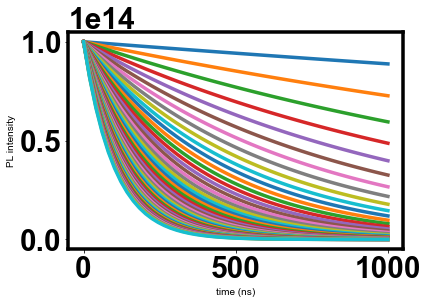

In [44]:
plt.plot(t*1e9, n)
plt.xlabel('time (ns)')
plt.ylabel('PL intensity')
plt.show()

In [45]:
n_avg = np.average(n, axis=0)

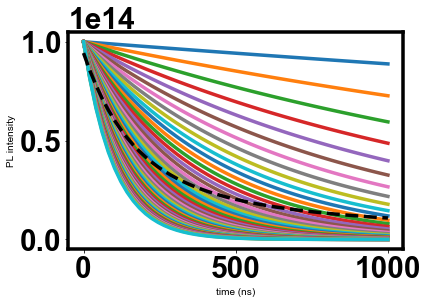

In [46]:
plt.plot(t*1e9, n)
plt.plot(t*1e9, n_avg,'k--', label="Average")
plt.xlabel('time (ns)')
plt.ylabel('PL intensity')
plt.show()

In [49]:
stretched_exp = stretch_exp_fit(n_avg/np.max(n_avg), t)
print("tau_c (ns) = "+str(stretched_exp[0]*1e9))
print("Beta = "+str(stretched_exp[1]))
print("avg. tau (ns) = "+str(stretched_exp[3]*1e9))

tau_c (ns) = 240.74601044414587
Beta = 0.6113600241592911
avg. tau (ns) = 353.6335567613981


In [51]:
double_exp = double_exp_fit(n_avg/np.max(n_avg), t)
print("tau1 (ns) = "+str(double_exp[0]*1e9))
print("a1 = "+str(double_exp[1]))
print("tau2 (ns) = "+str(double_exp[2]*1e9))
print("a2 = "+str(double_exp[3]))
print("avg. tau (ns) = "+str(double_exp[4]*1e9))

tau1 (ns) = 161.89946341102024
a1 = 0.6945103687604987
tau2 (ns) = 1013.0559126034422
a2 = 0.2998059970859529
avg. tau (ns) = 418.5399218118428


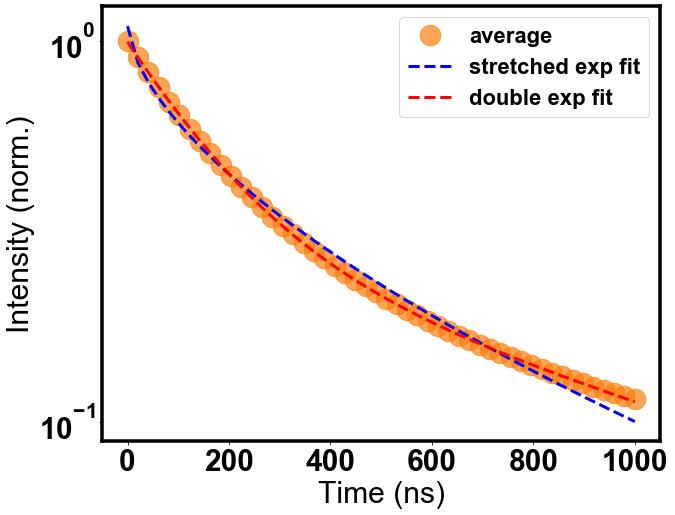

In [52]:
# plot
plt.figure(figsize=(10,8))
plt.plot(t*1e9, n_avg/np.max(n_avg),'C1o', alpha=0.7,label="average")
plt.plot(t*1e9, stretched_exp[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t*1e9, double_exp[5], 'r--', lw = 3, label="double exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend(fontsize=22)

### Fourth case k1 skewed gaussian distribution
Simple continuity equation considering just the radiative (k2) and defect-assisted non-radiative recombination (k1)
* k1 = skewed distribution with maximum at 1e5 ns and a size of 50 data points
* k2 = 2e-10 cm^3 s^-1
* n0 = 1e14
* t = 0 to 1000 ns

In [61]:
# skewed gaussian distribution of k1 values
skew = skewnorm.rvs(a = 10, loc = 1e5, scale=1000, size=50)

Text(0.5, 0, 'K1 values (s-1)')

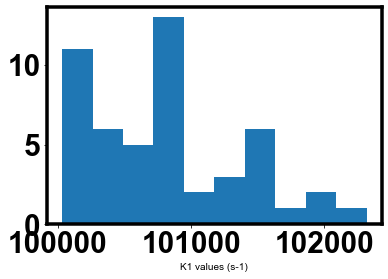

In [62]:
plt.figure()
plt.hist(skew)
plt.xlabel("K1 values (s-1)")

In [63]:
# function dn/dt
def model_4(n,t):
    k1= skew
    k2= 2e-10
    dndt= -(k2*(n**2) + k1*n)
    return dndt

In [64]:
# initial condition
n0 = np.tile(np.power(10, 14), 50)

In [65]:
# solve differential equation
n = odeint(model_4, n0, t)

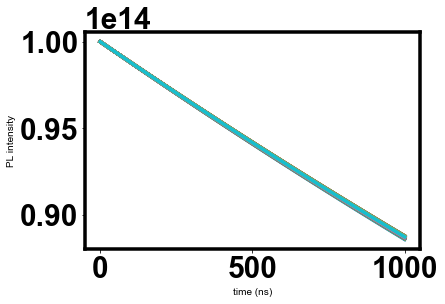

In [66]:
plt.plot(t*1e9, n)
plt.xlabel('time (ns)')
plt.ylabel('PL intensity')
plt.show()

In [69]:
n_skew_avg = np.average(n, axis=0)

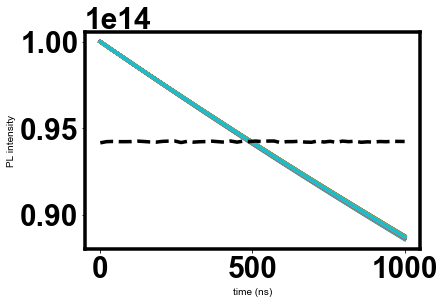

In [70]:
plt.plot(t*1e9, n)
plt.plot(t*1e9, n_skew_avg,'k--', label="Average")
plt.xlabel('time (ns)')
plt.ylabel('PL intensity')
plt.show()

### Fifth case k1 skewed gaussian distribution
Simple continuity equation considering just the radiative (k2) and defect-assisted non-radiative recombination (k1)
* k1 = skewed distribution with maximum at 1e6 ns and a size of 50 data points
* k2 = 2e-10 cm^3 s^-1
* n0 = 1e14
* t = 0 to 1000 ns

In [72]:
norm = exponnorm.rvs(K = 10, loc= 1e6, scale= 100, size= 50)

Text(0.5, 0, 'K1 values (s-1)')

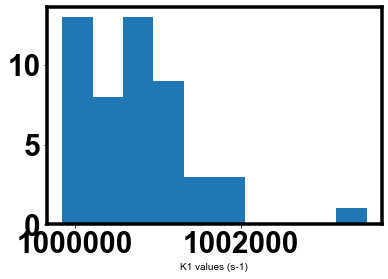

In [73]:
plt.figure()
plt.hist(norm)
plt.xlabel("K1 values (s-1)")

In [74]:
# function dn/dt
def model_5(n,t):
    k1= norm
    k2= 2e-10
    dndt= -(k2*(n**2) + k1*n)
    return dndt

In [75]:
# solve differential equation
n = odeint(model_5, n0, t)

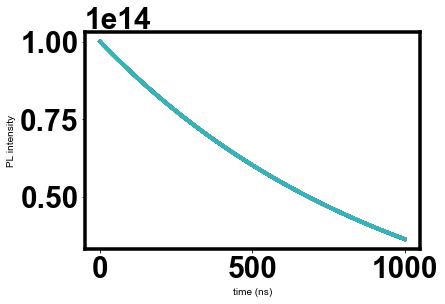

In [76]:
plt.plot(t*1e9, n)
plt.xlabel('time (ns)')
plt.ylabel('PL intensity')
plt.show()

In [77]:
n_skew_avg = np.average(n, axis=0)

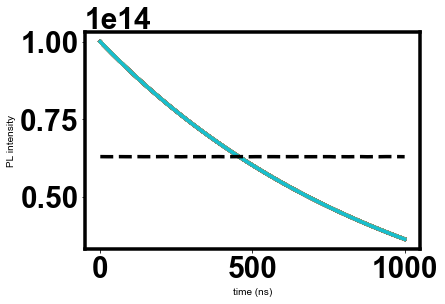

In [78]:
plt.plot(t*1e9, n)
plt.plot(t*1e9, n_skew_avg,'k--', label="Average")
plt.xlabel('time (ns)')
plt.ylabel('PL intensity')
plt.show()